<a href="https://colab.research.google.com/github/makkolli31/StillWork/blob/master/StillWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# univariate cnn example
from numpy import array
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import BatchNormalization
import pandas as pd
import numpy as np


Using TensorFlow backend.


In [5]:
#col_names_new = ['RequestRPM', 'CurrentRPM','WaterFreq', 'vibX', 'vibY', 'vibZ', 'UB', 'QCurrent2', 'RinseStep']
#df = pd.read_csv("/content/drive/My Drive/StillWork/V600_no01_1kgTowel_C3_HIGH_20190611_01_001.txt1_Extract.txt", sep=' ', header=None)
#df.columns = col_names_new
df1 = pd.read_csv("/content/drive/data/1kgTowel_Extract.txt", sep=' ')
df2 = pd.read_csv("/content/drive/data/T셔츠_Extract.txt", sep=' ')
df3 = pd.read_csv("/content/drive/data/Y셔츠_Extract.txt", sep=' ')
df4 = pd.read_csv("/content/drive/data/동1타200_Extract.txt", sep=' ')
df5 = pd.read_csv("/content/drive/data/동잠바_Extract.txt", sep=' ')
df6 = pd.read_csv("/content/drive/data/실용2_Extract.txt", sep=' ')
df7 = pd.read_csv("/content/drive/data/실용3_Extract.txt", sep=' ')
df8 = pd.read_csv("/content/drive/data/실용4_Extract.txt", sep=' ')
df9 = pd.read_csv("/content/drive/data/청바지_Extract.txt", sep=' ')
df10 = pd.read_csv("/content/drive/data/청팬티_Extract.txt", sep=' ')
df11 = pd.read_csv("/content/drive/data/추잠바_Extract.txt", sep=' ')
df12 = pd.read_csv("/content/drive/data/타월2_Extract.txt", sep=' ')
df13 = pd.read_csv("/content/drive/data/타월3_Extract.txt", sep=' ')
df14 = pd.read_csv("/content/drive/data/타월4_Extract.txt", sep=' ')
df15 = pd.read_csv("/content/drive/data/후드티_Extract.txt", sep=' ')

df_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], axis=0)

normalized_df=(df_data-df_data.mean())/df_data.std()

#with pd.option_context('display.float_format', '{:0.2f}'.format):
normalized_df.describe()

,RequestRPM,CurrentRPM,WaterFreq,vibX,vibY,vibZ,UB,QCurrent2,RinseStep
count,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,1.181652e+07,11816515.0
mean,3.189036e-13,5.908448e-14,2.137302e-13,-2.876929e-15,6.714504e-14,7.054715e-15,-7.590911e-14,4.598316e-14,0.0
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0
min,-2.539674e+00,-3.680870e+00,-2.587669e+01,-1.314598e+00,-7.503960e-01,-6.187454e-01,-6.328058e-01,-1.908099e+00,0.0
25%,-2.272638e-02,-6.037502e-02,-2.848223e-01,-6.314063e-01,-4.132162e-01,-3.143256e-01,-4.616686e-01,-7.062616e-01,0.0
50%,-2.272638e-02,1.922177e-01,5.044230e-02,-2.789659e-01,-2.764244e-01,-1.982214e-01,-3.437741e-01,-1.939740e-01,0.0
75%,-2.272638e-02,3.606128e-01,2.739521e-01,2.903608e-01,-3.163903e-02,1.421352e-03,-1.022805e-01,5.239378e-01,0.0
max,6.824947e+01,3.698655e+01,1.726765e+00,3.340349e+01,1.992797e+01,2.755495e+01,5.499438e+01,2.033121e+01,0.0


In [60]:
# features = ['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'UB']
features = ['CurrentRPM', 'vibX', 'vibY', 'vibZ', 'UB', 'WaterFreq', 'QCurrent2']
X_all = normalized_df[features].values
X1 = df1[features].values
X2 = df2[features].values
X3 = df3[features].values
X4 = df4[features].values
X5 = df5[features].values
X6 = df6[features].values
X7 = df7[features].values
X8 = df8[features].values
X9 = df9[features].values
X10 = df10[features].values
X11 = df11[features].values
X12 = df12[features].values
X13 = df13[features].values
X14 = df14[features].values
X15 = df15[features].values
# X = np.vstack((X,df[['RequestRPM', 'vibX']].values))
# X = np.vstack((X,df[['RequestRPM', 'vibX']].values))
# X = np.vstack((X,df[['RequestRPM', 'vibX']].values))
# X = np.row_stack([X, df[['RequestRPM', 'vibX']].values])

print(X_all.shape)
print(X_all[:4])

(11816515, 7)
[[-3.59667278  1.32599328  3.97132154  1.47537925 -0.63280577 -0.17306746
  -0.87643326]
 [-3.42827765  1.32599328  3.97132154  1.47537925 -0.63280577 -0.17306746
  -0.19220134]
 [-3.25988252  1.32599328  3.97132154  1.47537925 -0.63280577 -0.17306746
   0.35553872]
 [-2.67049956  1.32599328  3.97132154  1.47537925 -0.63280577 -0.17306746
   0.48671271]]


In [0]:
def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(0,len(sequences), n_steps_in):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # check if we are beyond the dataset
    if out_end_ix > len(sequences):
        break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [62]:
X1_data, _ = split_sequences(X1, 140, 1)
X2_data, _ = split_sequences(X2, 140, 1)
X3_data, _ = split_sequences(X3, 140, 1)
X4_data, _ = split_sequences(X4, 140, 1)
X5_data, _ = split_sequences(X5, 140, 1)
X6_data, _ = split_sequences(X6, 140, 1)
X7_data, _ = split_sequences(X7, 140, 1)
X8_data, _ = split_sequences(X8, 140, 1)
X9_data, _ = split_sequences(X9, 140, 1)
X10_data, _ = split_sequences(X10, 140, 1)
X11_data, _ = split_sequences(X11, 140, 1)
X12_data, _ = split_sequences(X12, 140, 1)
X13_data, _ = split_sequences(X13, 140, 1)
X14_data, _ = split_sequences(X14, 140, 1)
X15_data, _ = split_sequences(X15, 140, 1)
#n_features = X.shape[1]
# X_data = X.reshape(-1, X.shape[0], X.shape[1])

X_data2 = np.vstack((X1_data, X2_data, X3_data, X4_data, X5_data, X6_data, X7_data, X8_data, X9_data, X10_data, X11_data, X12_data, X13_data, X14_data, X15_data))
X_data, _ = split_sequences(X_all, 140, 1)
X_data = X_data[:-8]

# y_all = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], (X_data.shape[0],1))

LABELS = ['1kgTowel', 'TShirts', 'YShirts', 'WinterT200', 'WinterJumper', 'Real2', 'Real3', 'Real4', 'Jean', 'Jeanpants', 'FallJumper', 'Towel2', 'Towel3', 'Towel4', 'Hood']

y1 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], (X1_data.shape[0],1))
y2 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], (X2_data.shape[0],1))
y3 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], (X3_data.shape[0],1))
y4 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], (X4_data.shape[0],1))
y5 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], (X5_data.shape[0],1))
y6 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], (X6_data.shape[0],1))
y7 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], (X7_data.shape[0],1))
y8 = np.tile([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], (X8_data.shape[0],1))
y9 = np.tile([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], (X9_data.shape[0],1))
y10 = np.tile([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X10_data.shape[0],1))
y11 = np.tile([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X11_data.shape[0],1))
y12 = np.tile([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X12_data.shape[0],1))
y13 = np.tile([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X13_data.shape[0],1))
y14 = np.tile([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X14_data.shape[0],1))
y15 = np.tile([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], (X15_data.shape[0],1))
y = np.vstack((y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15))


#print(X1_data[:10])
#print(X1_data.shape, y1.shape)
#print(X2_data.shape, y2.shape)
#print(X_data.shape, y.shape)

import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

# X_data.shape

# scaler = StandardScaler()
# scaler.fit(X_data)
# X_sc = scaler.transform(X_data)
# np.mean(X_sc), np.std(X_sc)

# scalers = {}
# X_sc = np.empty_like(X_data)
# for i in range(X_data.shape[2]):
#     scalers[i] = StandardScaler()
#     X_sc[:, :, i] = scalers[i].fit_transform(X_data[:, :, i]) 

# for i in range(X_test.shape[1]):
    # X_test[:, i, :] = scalers[i].transform(X_test[:, i, :]) 


X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2)
X_data.shape, y.shape
# X_train.shape , y_train.shape
# np.mean(X_sc[:,:,0]), np.std(X_sc[:,:,0])
# np.mean(X_data[:,:,0]), np.std(X_data[:,:,0])
#for i in range(1):
    #print(X_data[i], y[i])
    #print(X_data[X1_data.shape[0]], y[X1_data.shape[0]])

((84395, 140, 7), (84395, 15))

In [63]:
# define model
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', padding='same', input_shape=(X_data.shape[1], X_data.shape[2]))) 
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 2, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 2, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(15, activation='softmax'))
#model.compile(optimizer='adam', loss='mse')
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 140, 32)           480       
_________________________________________________________________
batch_normalization_10 (Batc (None, 140, 32)           128       
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 70, 32)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 70, 64)            4160      
_________________________________________________________________
batch_normalization_11 (Batc (None, 70, 64)            256       
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 35, 64)            0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 35, 128)         

In [64]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
]

BATCH_SIZE = 100
EPOCHS = 30

history = model.fit(X_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

_, accuracy = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

print(accuracy)
# demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

Train on 54012 samples, validate on 13504 samples
Epoch 1/30
54012/54012 [==============================] - 33s 618us/step - loss: 0.7438 - acc: 0.7315 - val_loss: 0.5415 - val_acc: 0.7963
Epoch 2/30
54012/54012 [==============================] - 30s 557us/step - loss: 0.4635 - acc: 0.8273 - val_loss: 0.4601 - val_acc: 0.8286
Epoch 3/30
54012/54012 [==============================] - 30s 561us/step - loss: 0.3880 - acc: 0.8539 - val_loss: 0.3878 - val_acc: 0.8541
Epoch 4/30
54012/54012 [==============================] - 30s 560us/step - loss: 0.3352 - acc: 0.8724 - val_loss: 0.4892 - val_acc: 0.8065
Epoch 5/30
54012/54012 [==============================] - 31s 571us/step - loss: 0.2987 - acc: 0.8853 - val_loss: 0.3211 - val_acc: 0.8762
Epoch 6/30
54012/54012 [==============================] - 30s 561us/step - loss: 0.2602 - acc: 0.8995 - val_loss: 0.3697 - val_acc: 0.8631
Epoch 7/30
54012/54012 [==============================] - 31s 580us/step - loss: 0.2452 - acc: 0.9055 - val_loss: 0.

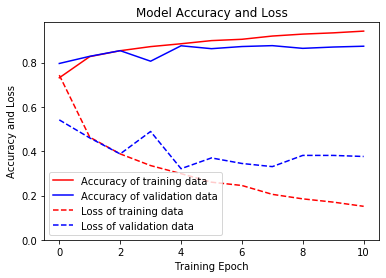

In [65]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [0]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(12, 8))
    
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    
    plt.show()

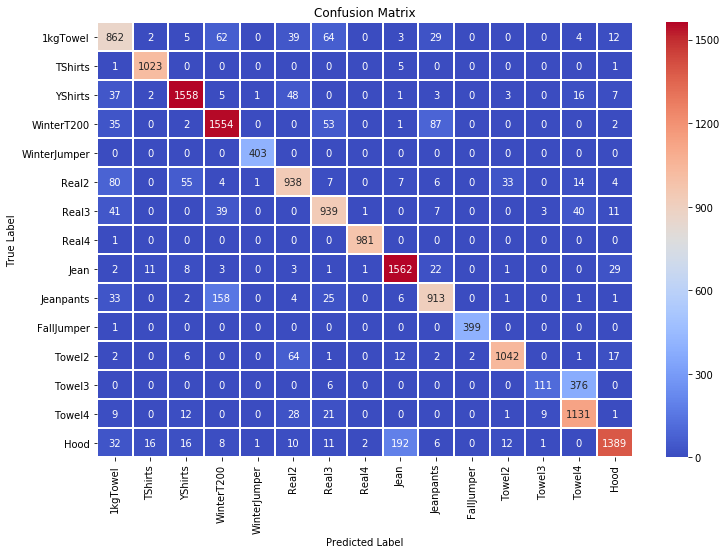

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1082
           1       0.97      0.99      0.98      1030
           2       0.94      0.93      0.93      1681
           3       0.85      0.90      0.87      1734
           4       0.99      1.00      1.00       403
           5       0.83      0.82      0.82      1149
           6       0.83      0.87      0.85      1081
           7       1.00      1.00      1.00       982
           8       0.87      0.95      0.91      1643
           9       0.85      0.80      0.82      1144
          10       1.00      1.00      1.00       400
          11       0.95      0.91      0.93      1149
          12       0.90      0.23      0.36       493
          13       0.71      0.93      0.81      1212
          14       0.94      0.82      0.88      1696

    accuracy                           0.88     16879
   macro avg       0.89      0.86      0.86     16879
weighted avg       0.88   

In [67]:
y_pred_test = model.predict(X_test)
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [0]:
#print(X_data[X1_data.shape[0]].reshape(1, 140, 5))
print(y[3].reshape(1, 1, 15))
for i in range(X_data.shape[0]):
  x_input = X_data[i].reshape(1, 140, 5)
  yhat = model.predict(x_input, verbose=0)
  print([ "{:0.2f}".format(x) for x in yhat[0] ])

In [0]:
from google.colab import files
files.upload()

Saving V600_no01_Hood_C3_HIGH_20190624_01_001.txt to V600_no01_Hood_C3_HIGH_20190624_01_001 (1).txt


KeyboardInterrupt: ignored

Normalization 할 것

Conv1D를 32 64 128 과 같은 방식으로

Dense Layer 이전을 100정도로, 삭제 하는것이 용량 아낌이 좋음

비슷한 Feature에 대해서 묶어 주면 Accuracy 상승 가능
